In [2]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# from IPython.display import set_matplotlib_formats


In [3]:
import os

# 한글 폰트 설정
if os.name == "posix":
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
    
# 마이너스 폰트 깨지는 문제 대응
plt.rc('axes', unicode_minus=False)

In [4]:
%config InlineBackend.figure_format = 'retina'
# set_matplotlib_formats('retina')


In [5]:
# Data load
df = pd.read_csv("Data/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")

# Data preview
df.head()


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [7]:
# Data Columns
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [8]:
# Data types
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

<AxesSubplot:>

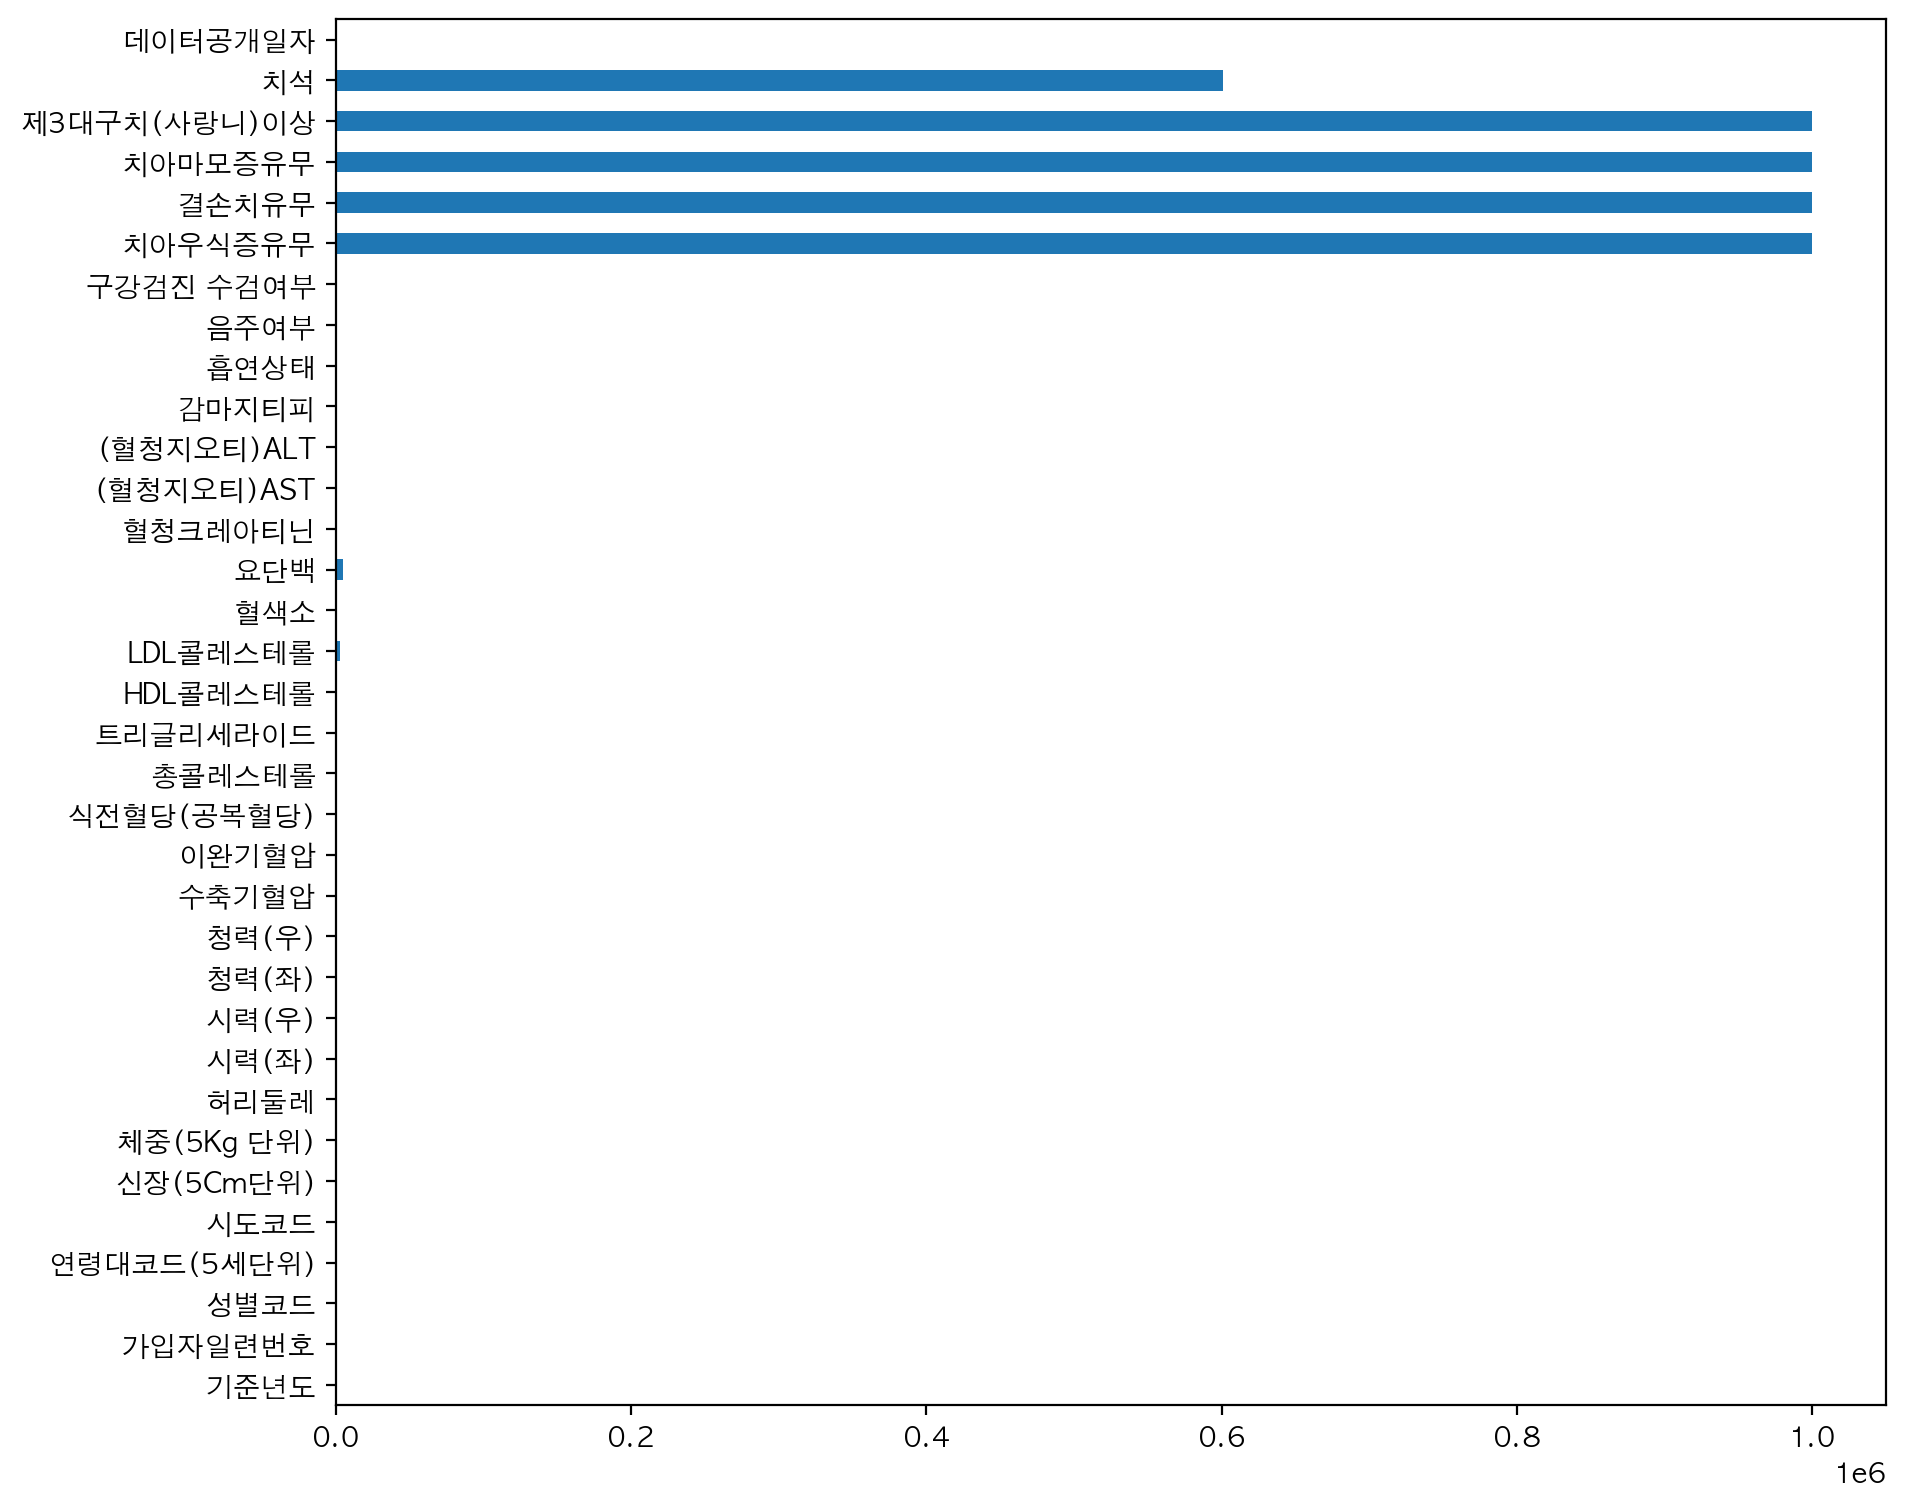

In [9]:
# Data isnull
df.isnull().sum().plot.barh(figsize=(10, 9))

# df.isna().sum()

In [10]:
# Data 요약하기
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


In [11]:
df["성별코드"].value_counts()
df["흡연상태"].value_counts()

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

In [12]:
df.groupby(["성별코드"])["가입자일련번호"].count()


성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [13]:
# 성별코드와 음주여부로 그룹화를 하고 가입자 일련번호를 사용하여 갯수를 세어본다. 
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [14]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피(간수치)의 평균을 구합니다. 
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [15]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피(간수치)의 요약정보를 구합니다. 
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [16]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피(간수치)의 요약정보를 구합니다. 
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "min", "median"])

count  min  median
성별코드 음주여부                     
1    0.0   175139  1.0    25.0
     1.0   355819  1.0    37.0
2    0.0   327559  1.0    17.0
     1.0   140913  1.0    17.0

In [17]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [18]:
pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피", aggfunc=["describe"])

describe                                                        
               25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                                 
1    0.0      18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0      24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0      13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0      13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

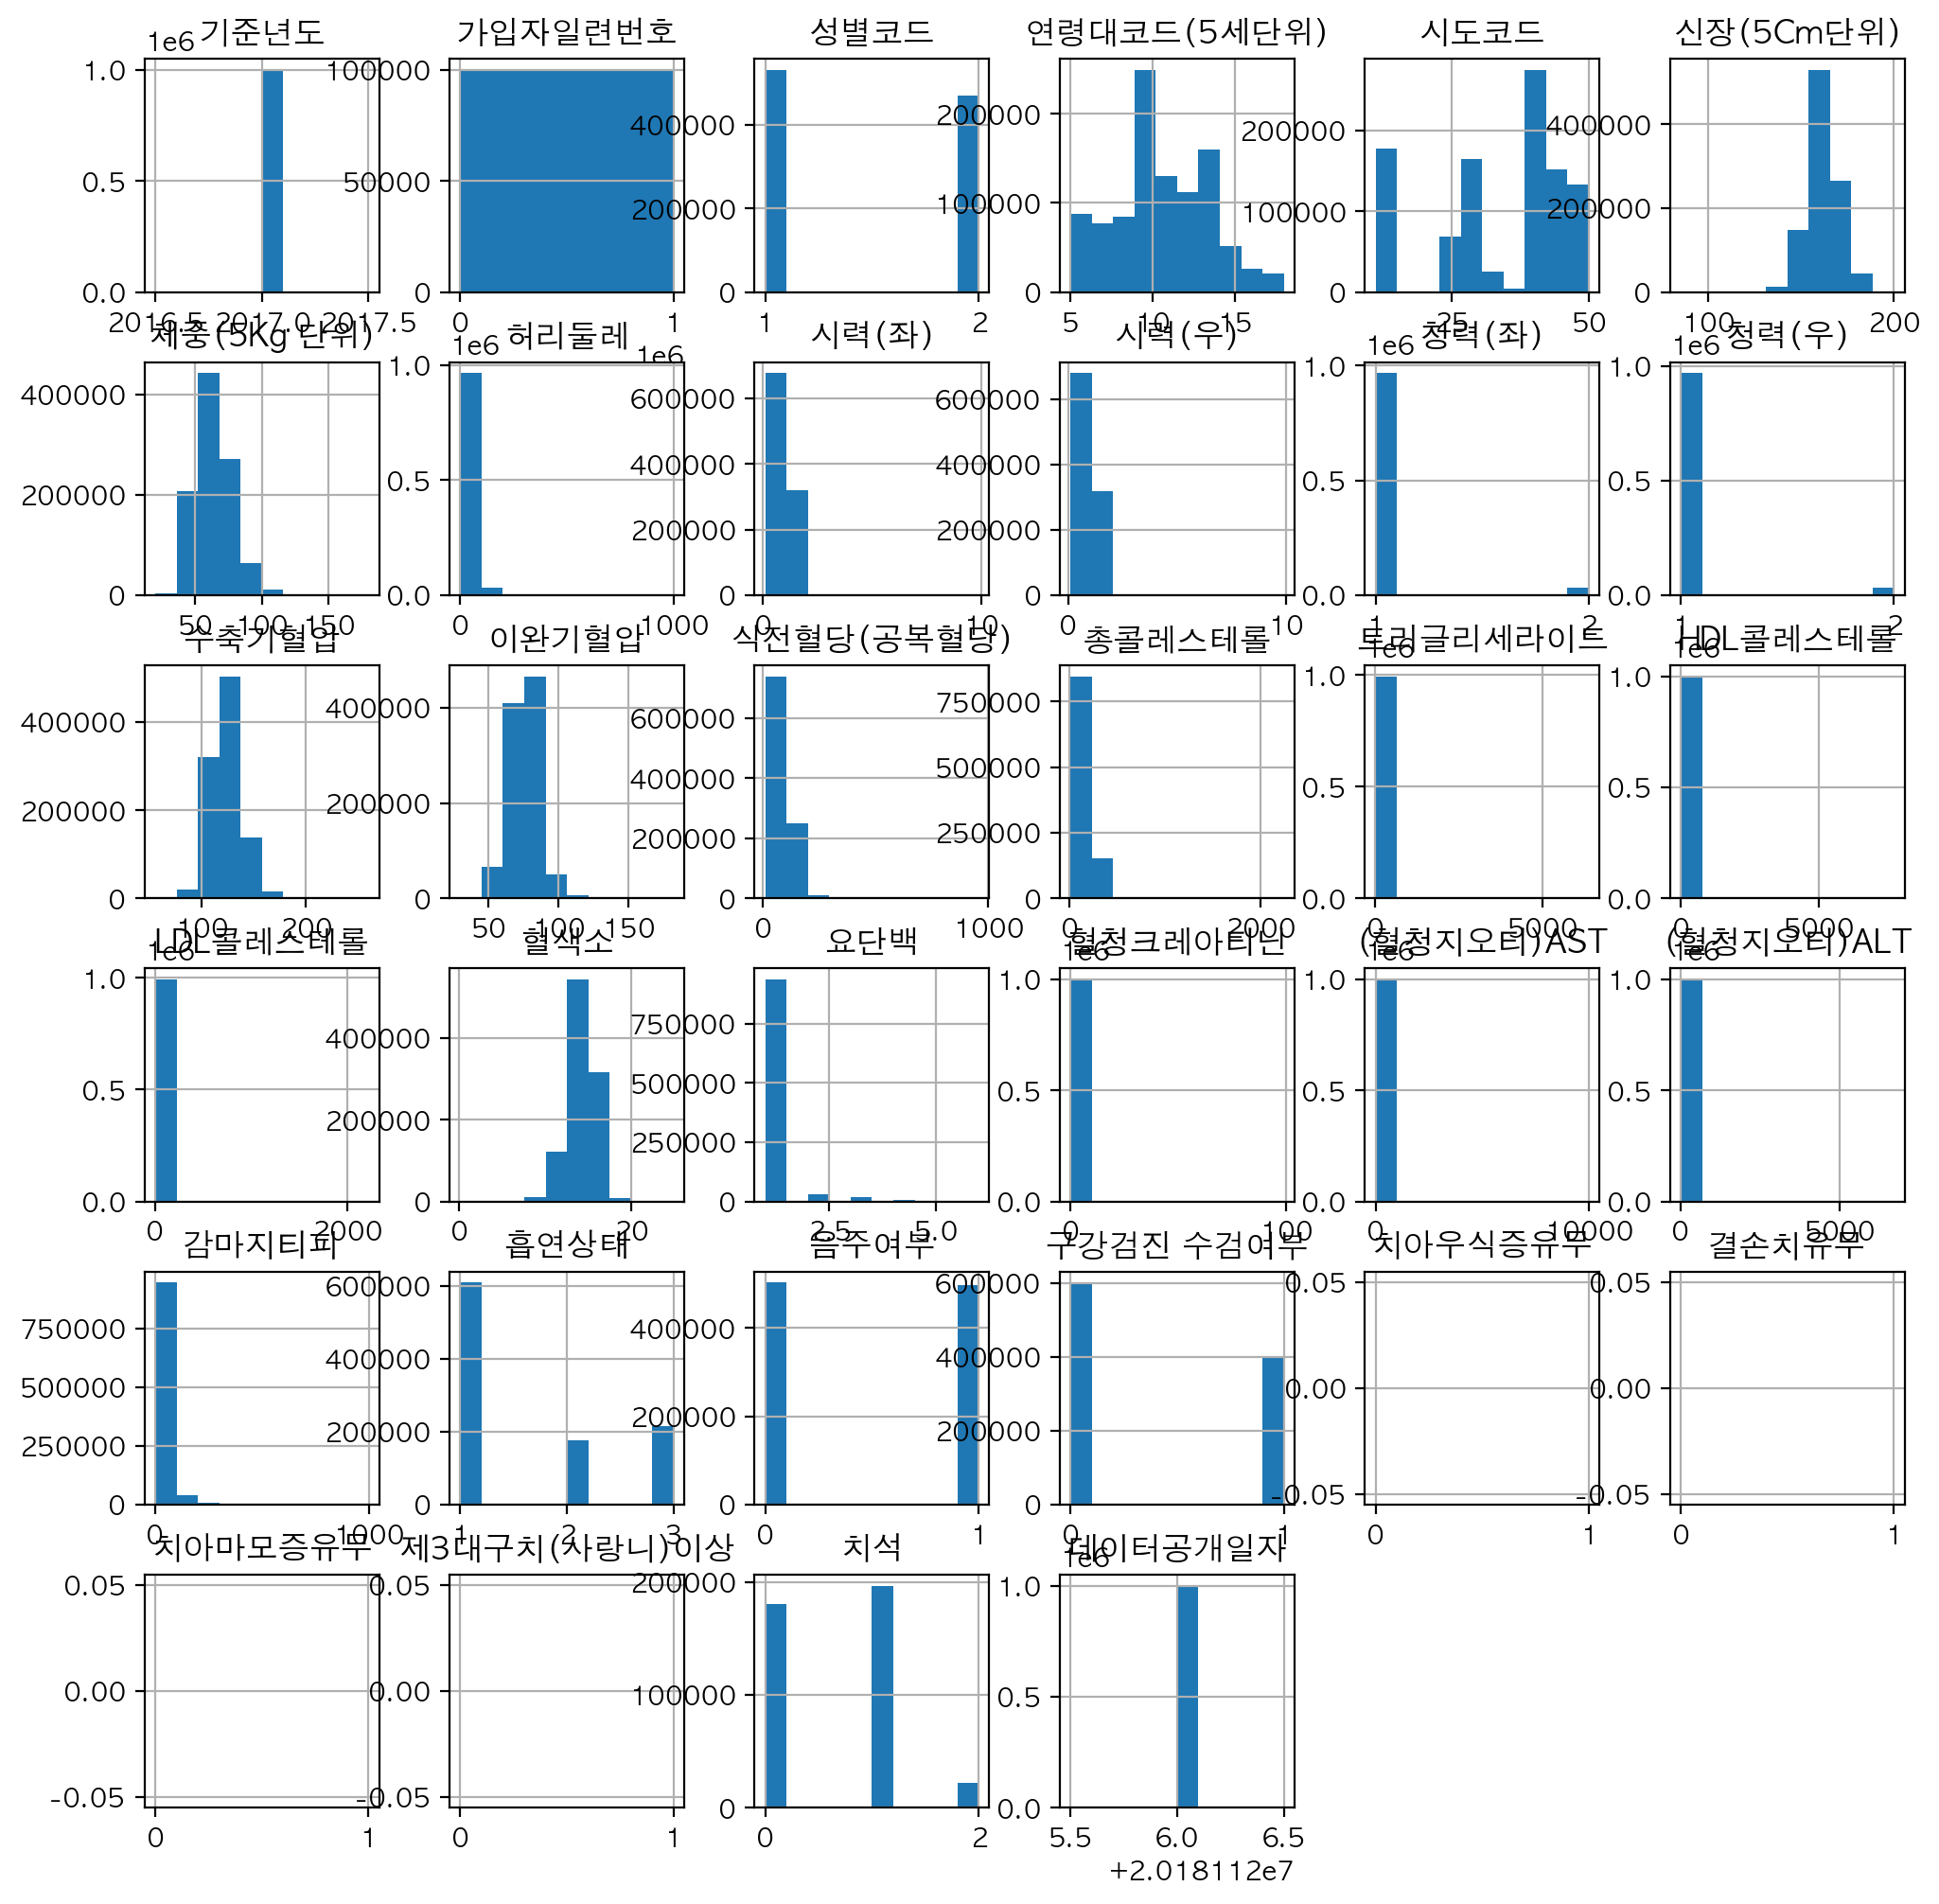

In [19]:
h = df.hist(figsize=(12, 12))

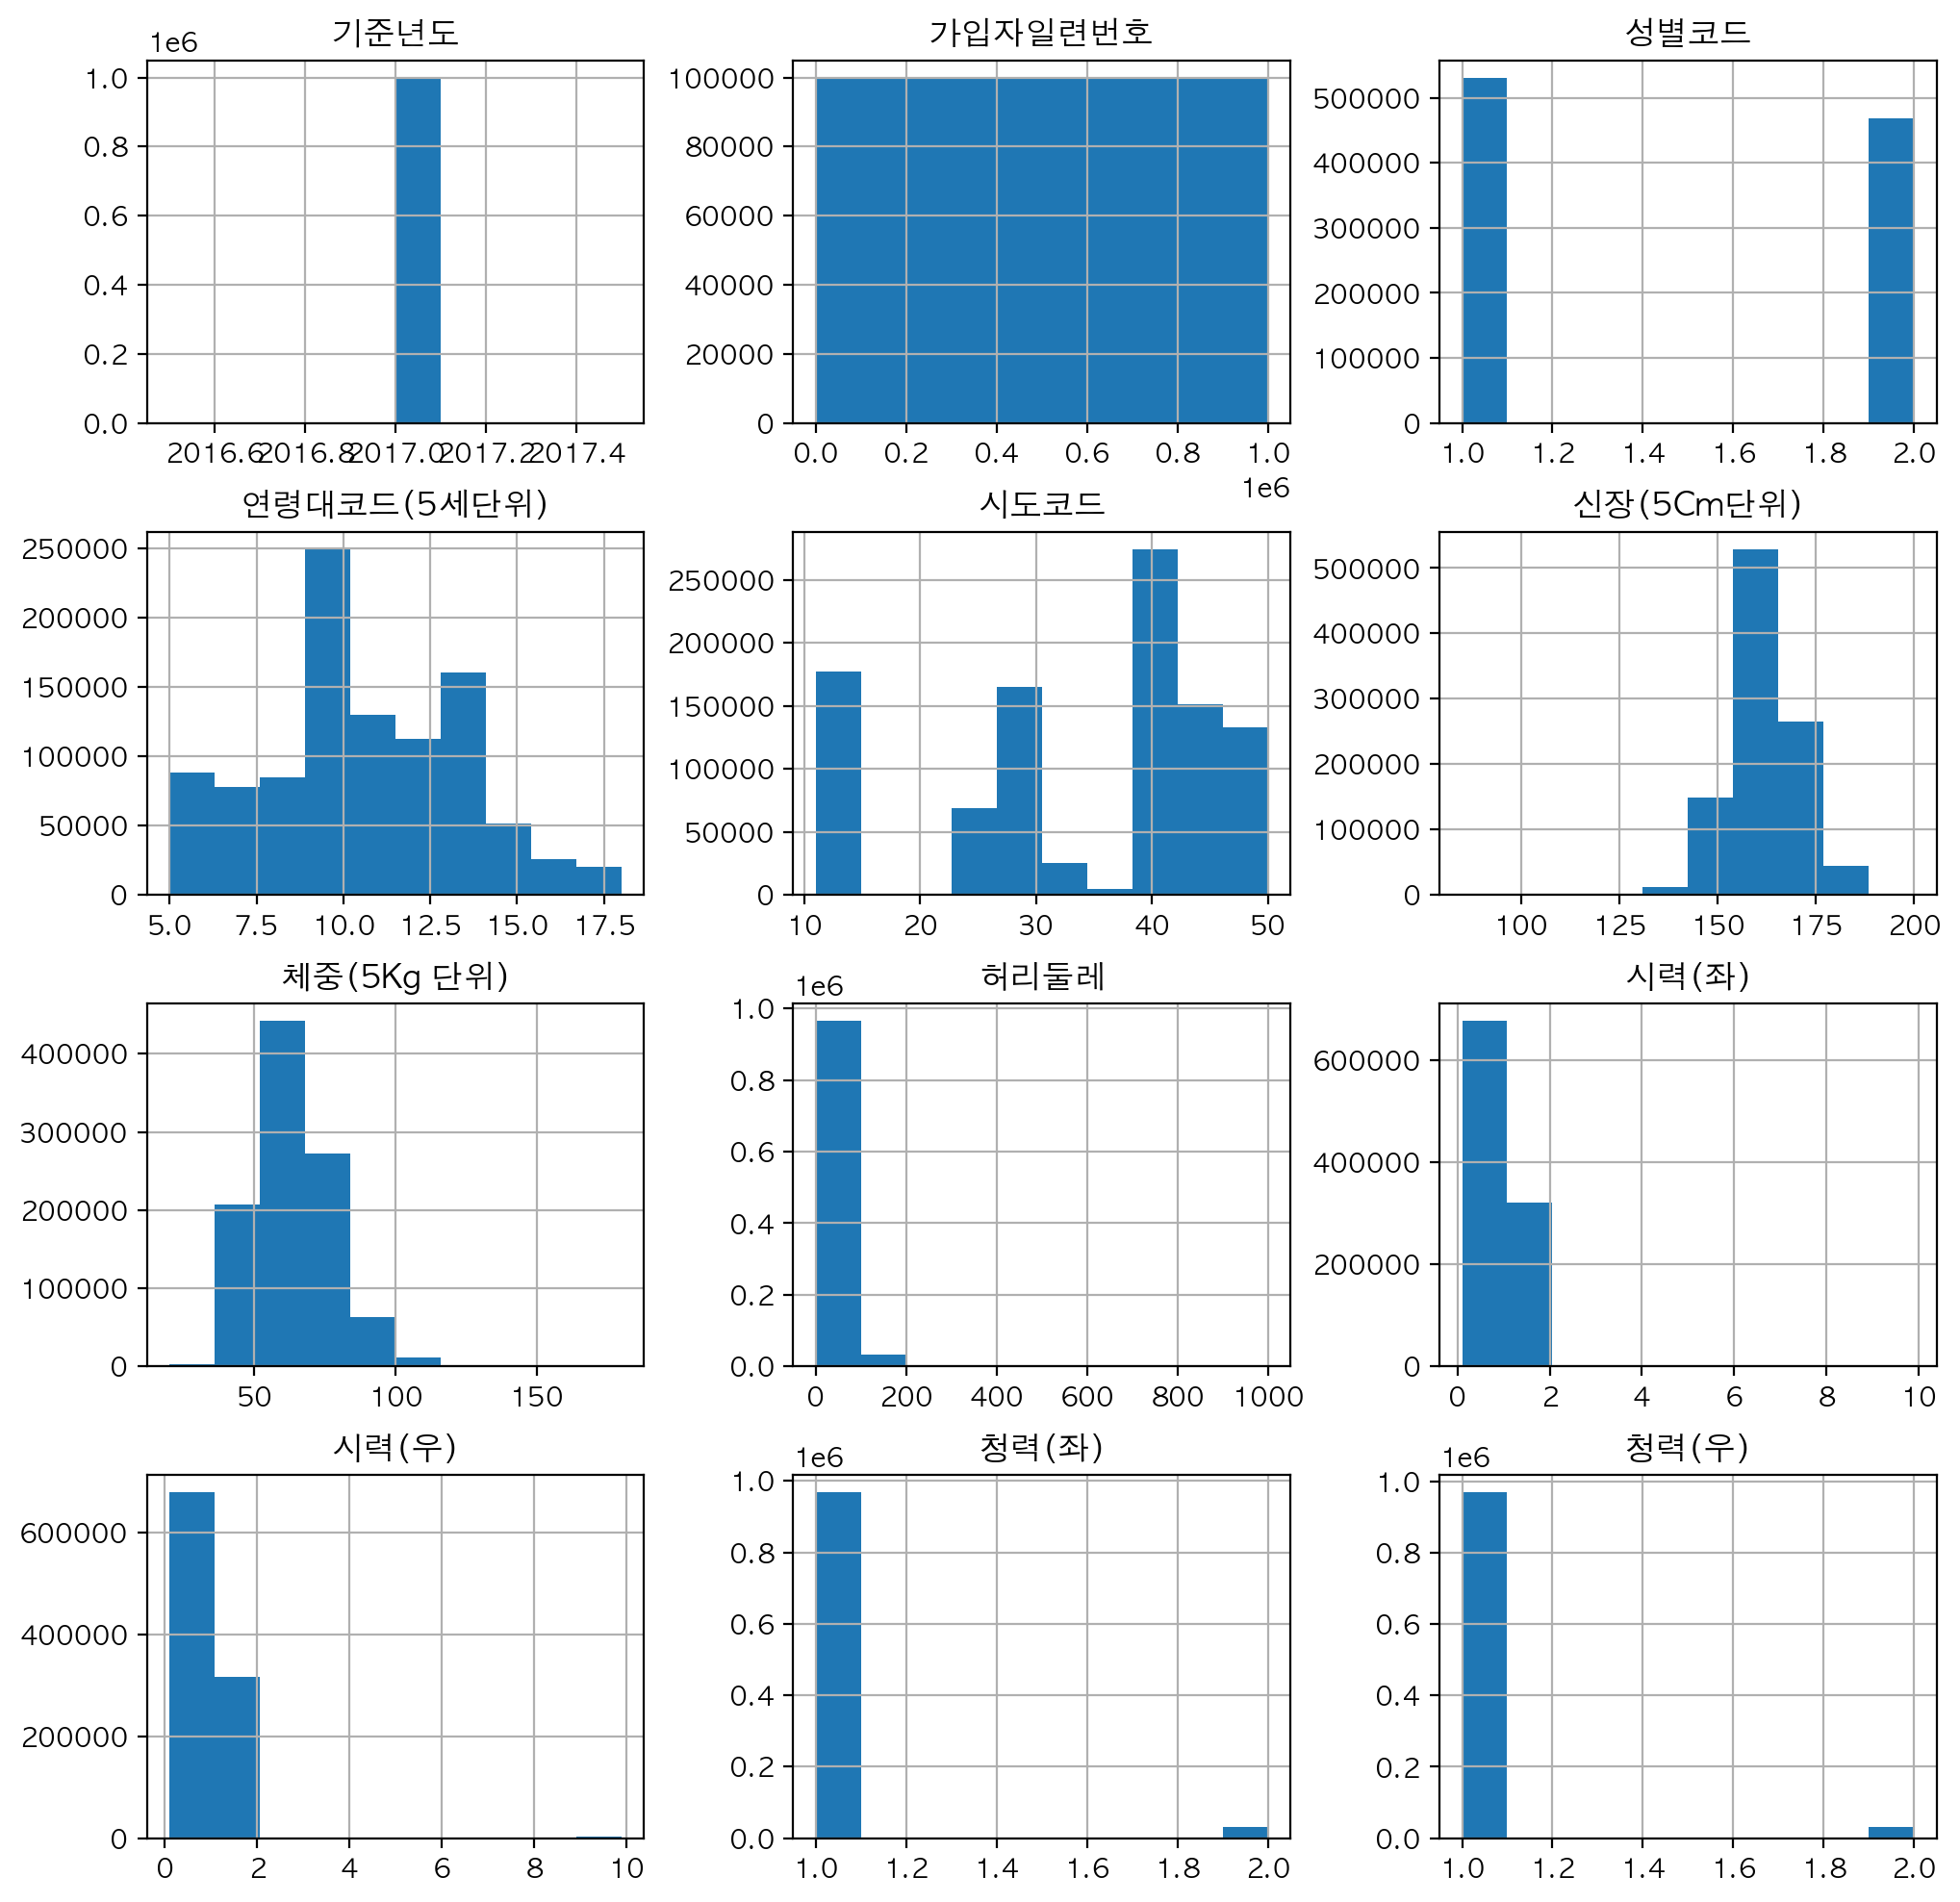

In [20]:
h = df.iloc[:,:12].hist(figsize=(12, 12))

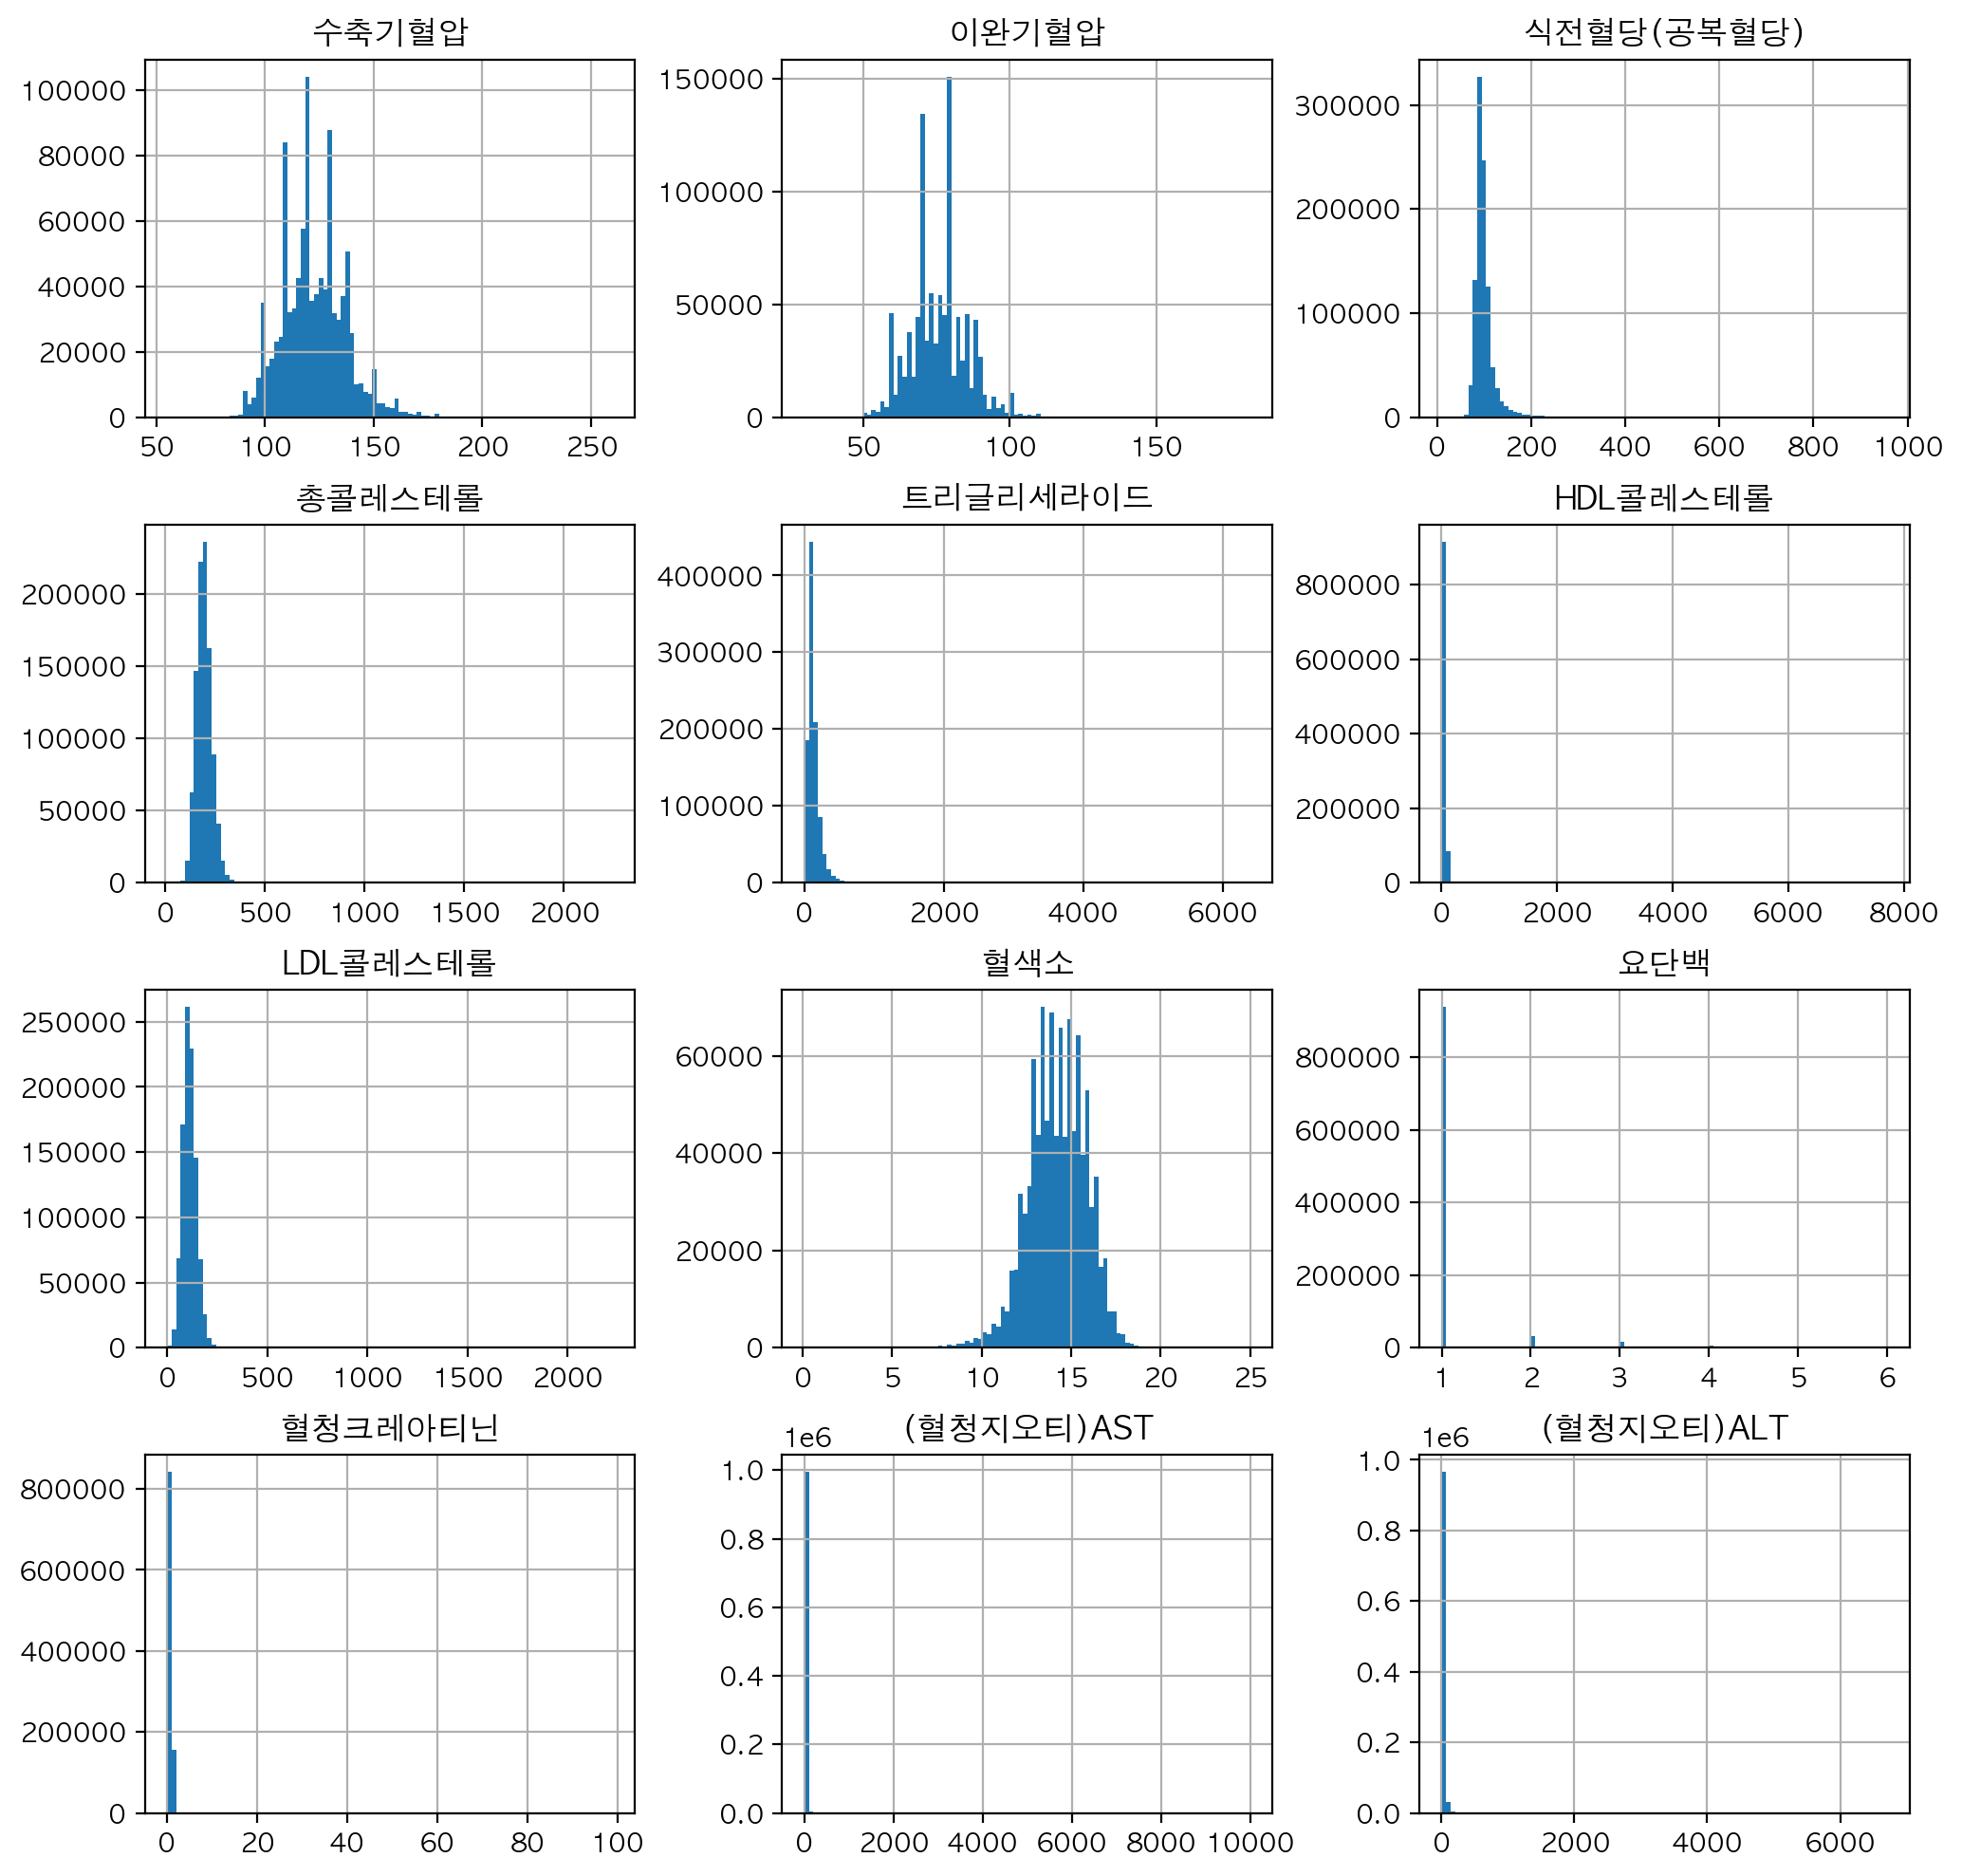

In [21]:
h = df.iloc[:,12:24].hist(figsize=(12, 12), bins=100)

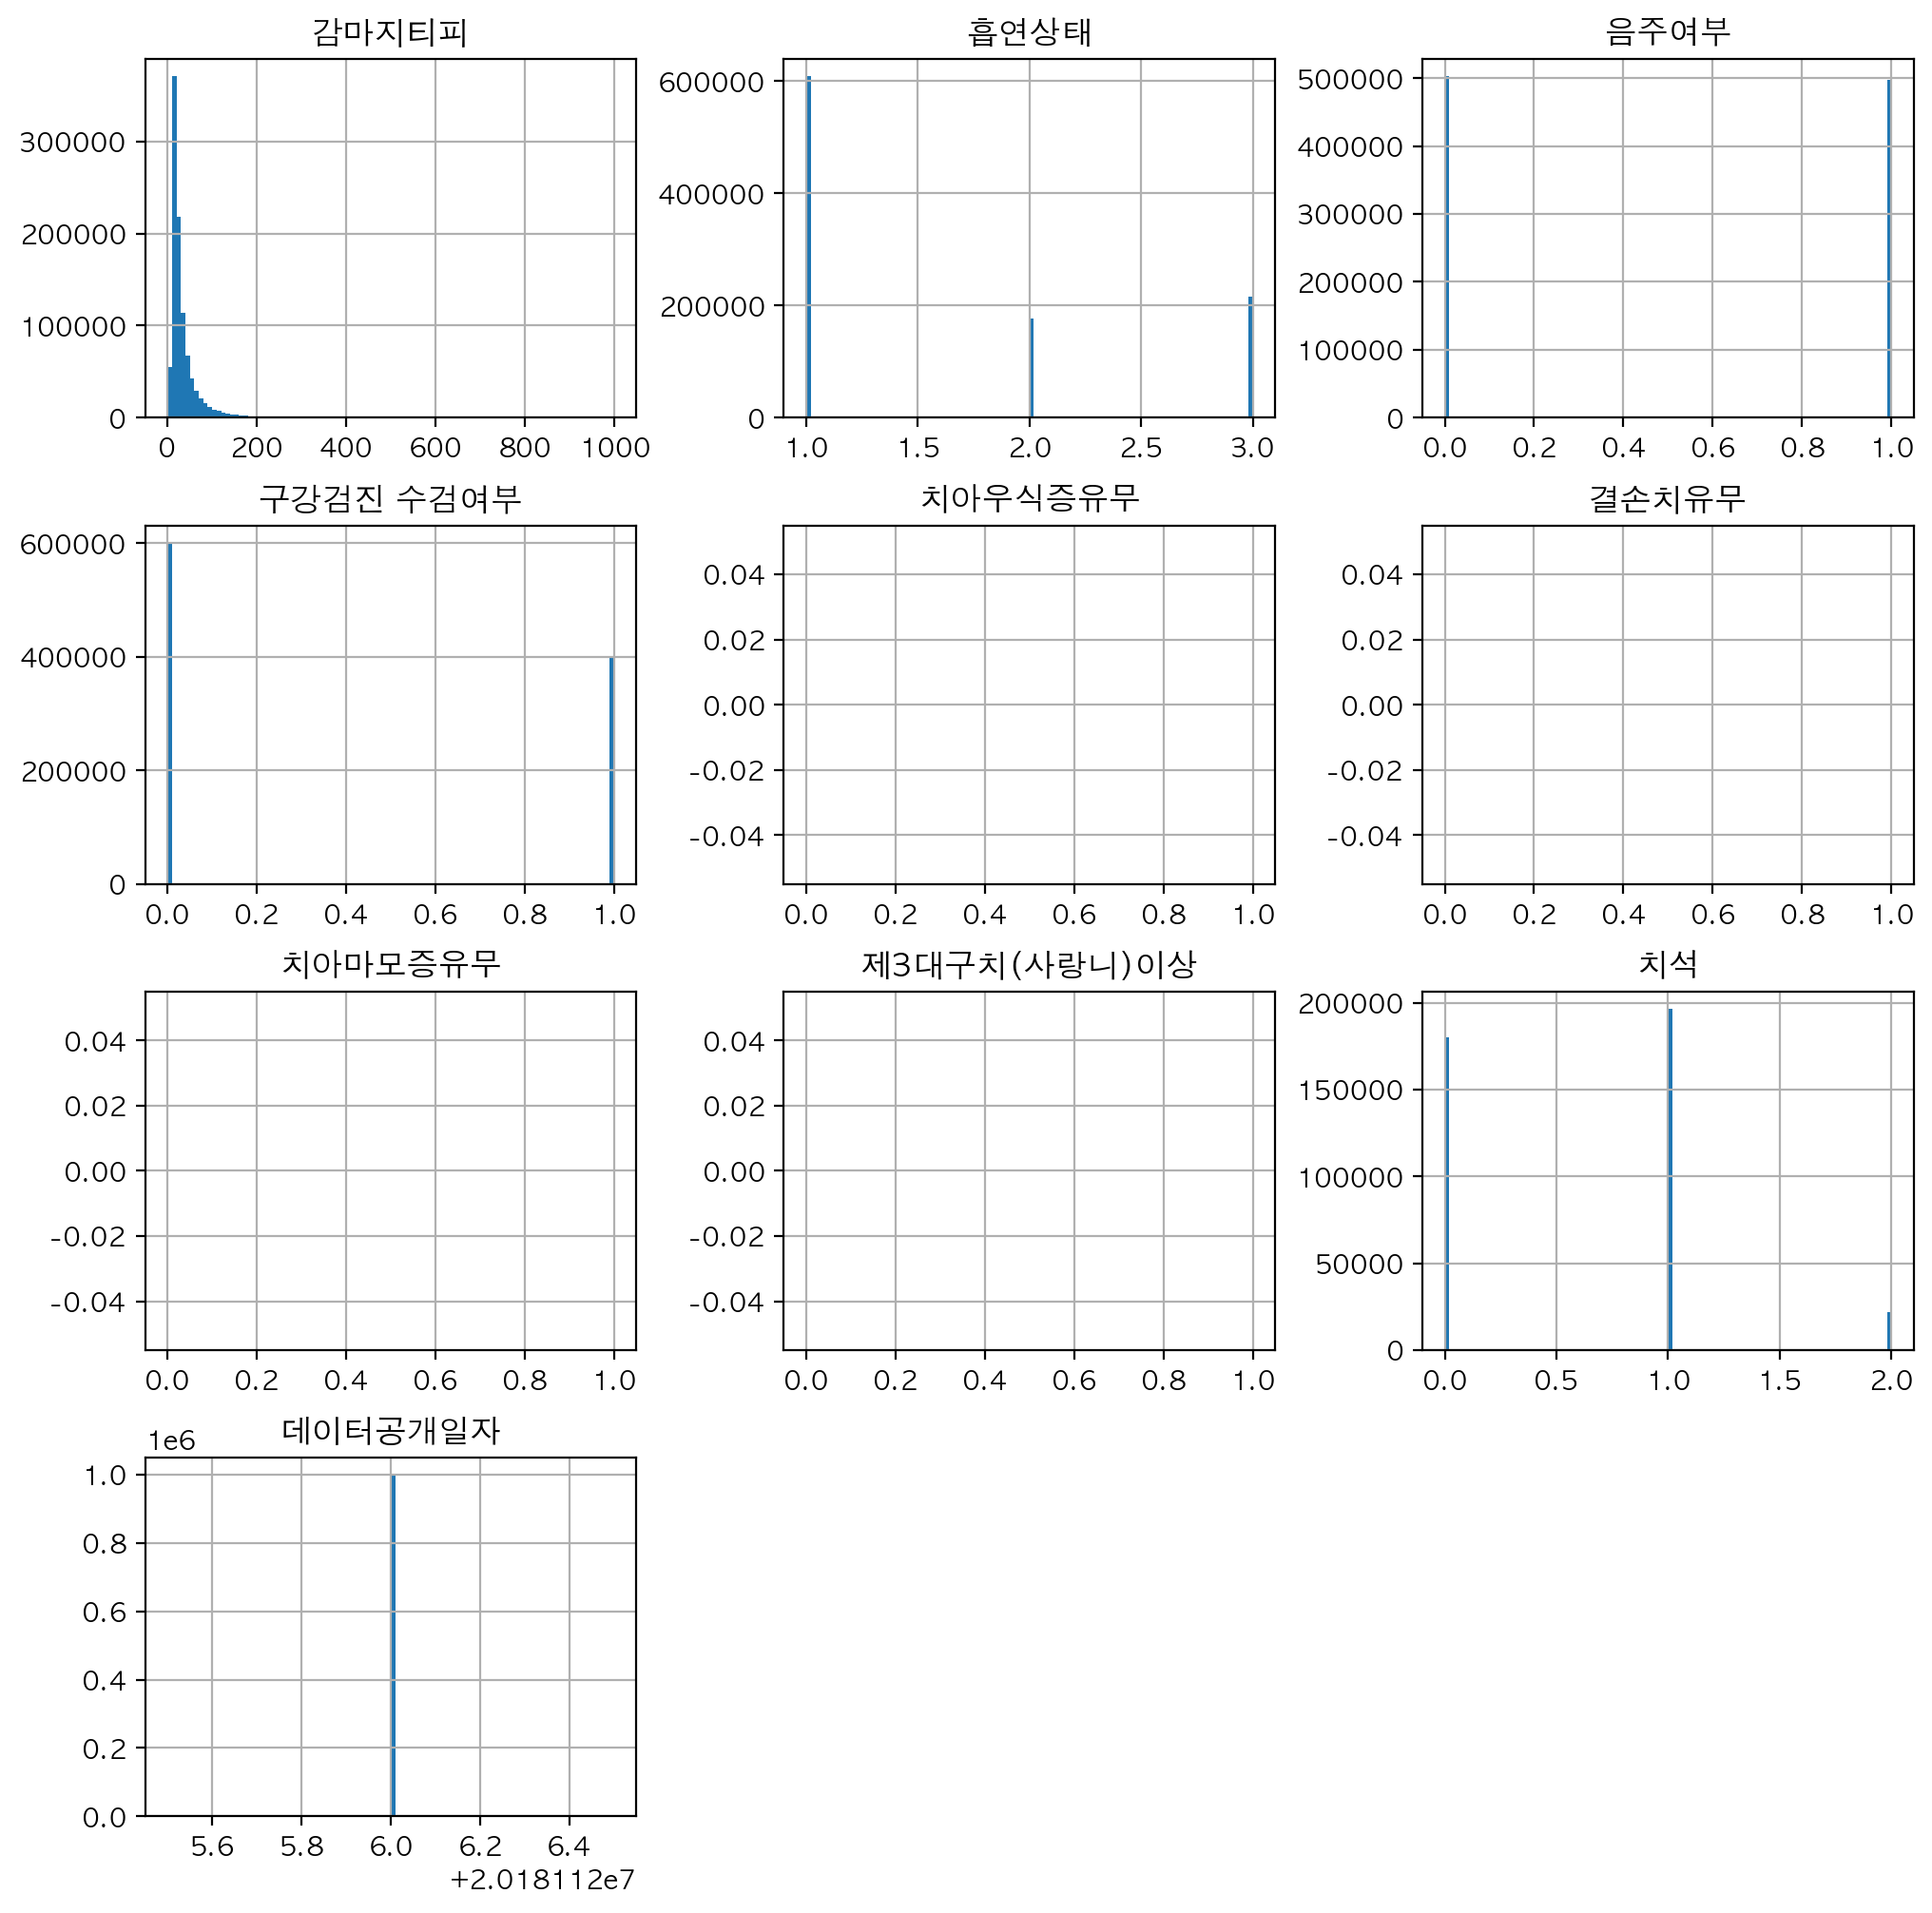

In [22]:
h2 = df.iloc[:,24:].hist(figsize=(12, 12), bins=100)

In [23]:
df_sample = df.sample(1000, random_state=1)

<AxesSubplot:>

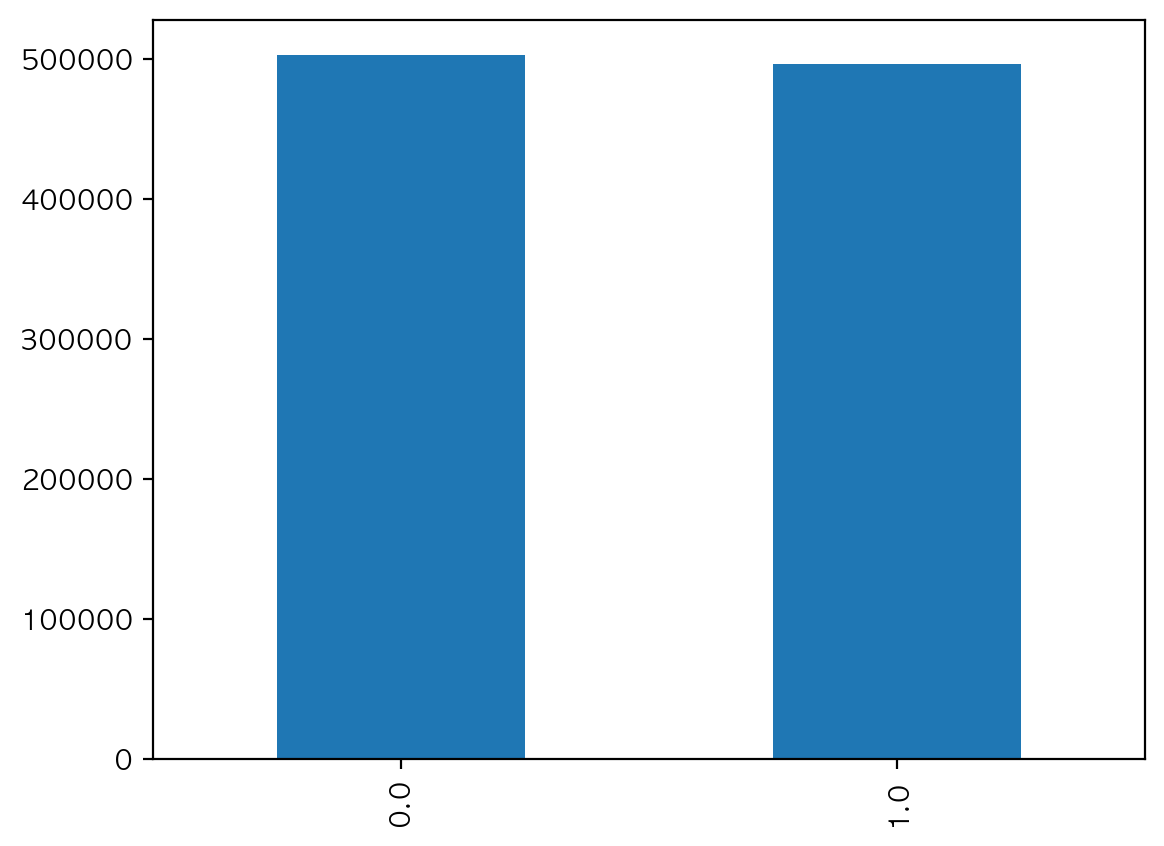

In [24]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

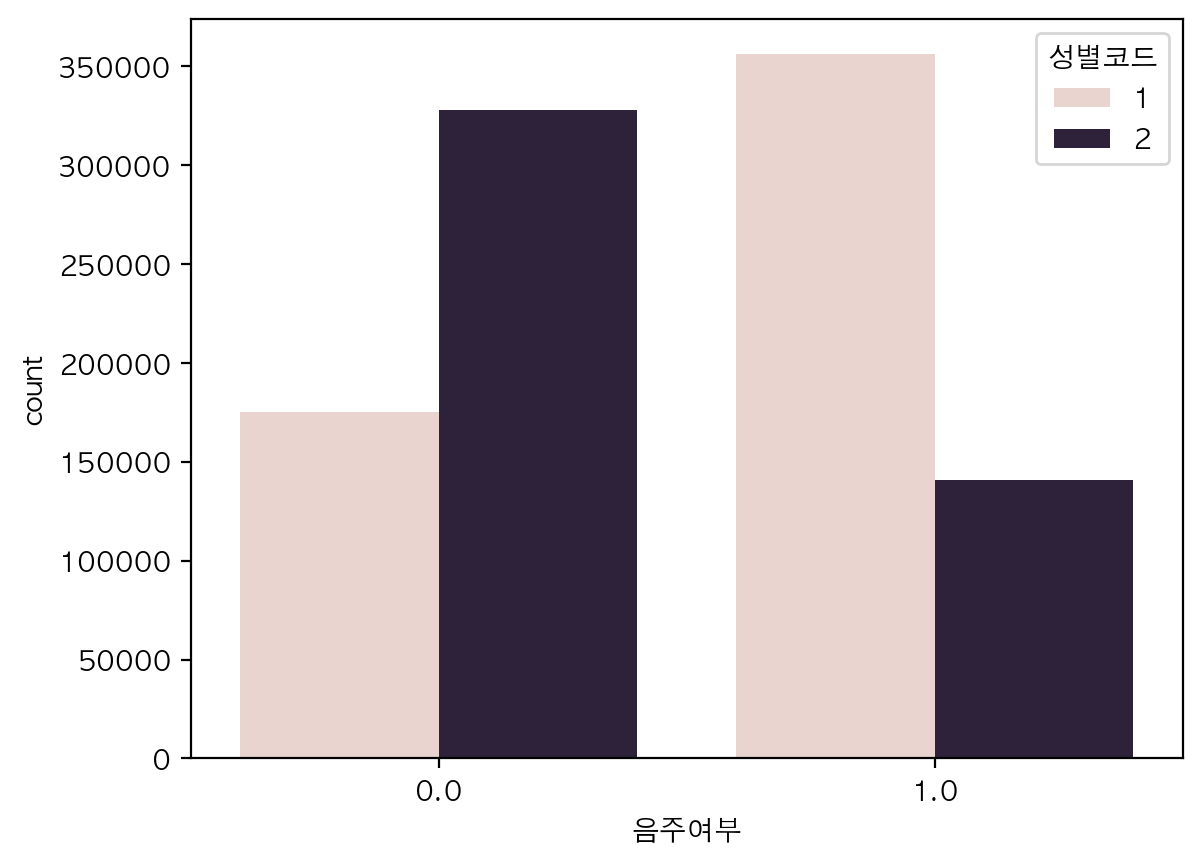

In [25]:
# sns.set(font_scale=1, font="AppleGothic")
sns.countplot(x="음주여부", data=df, hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

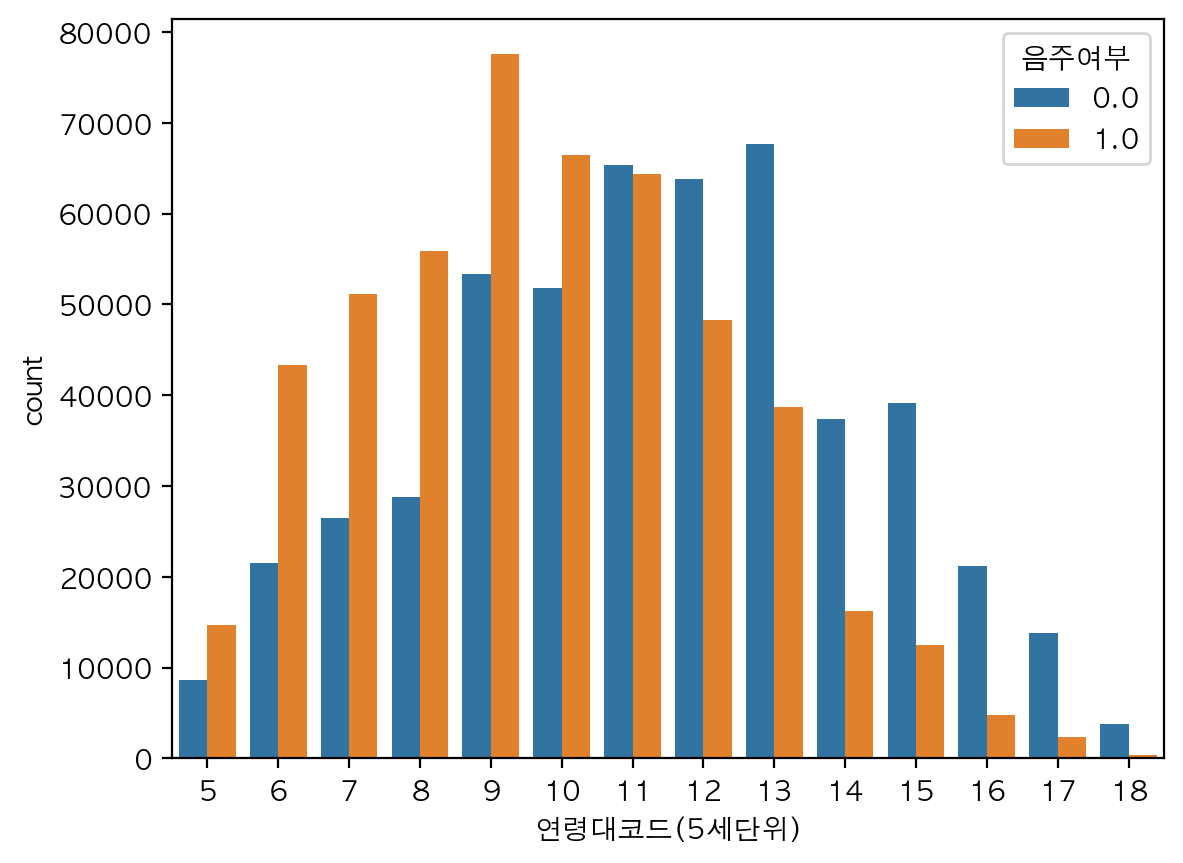

In [26]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

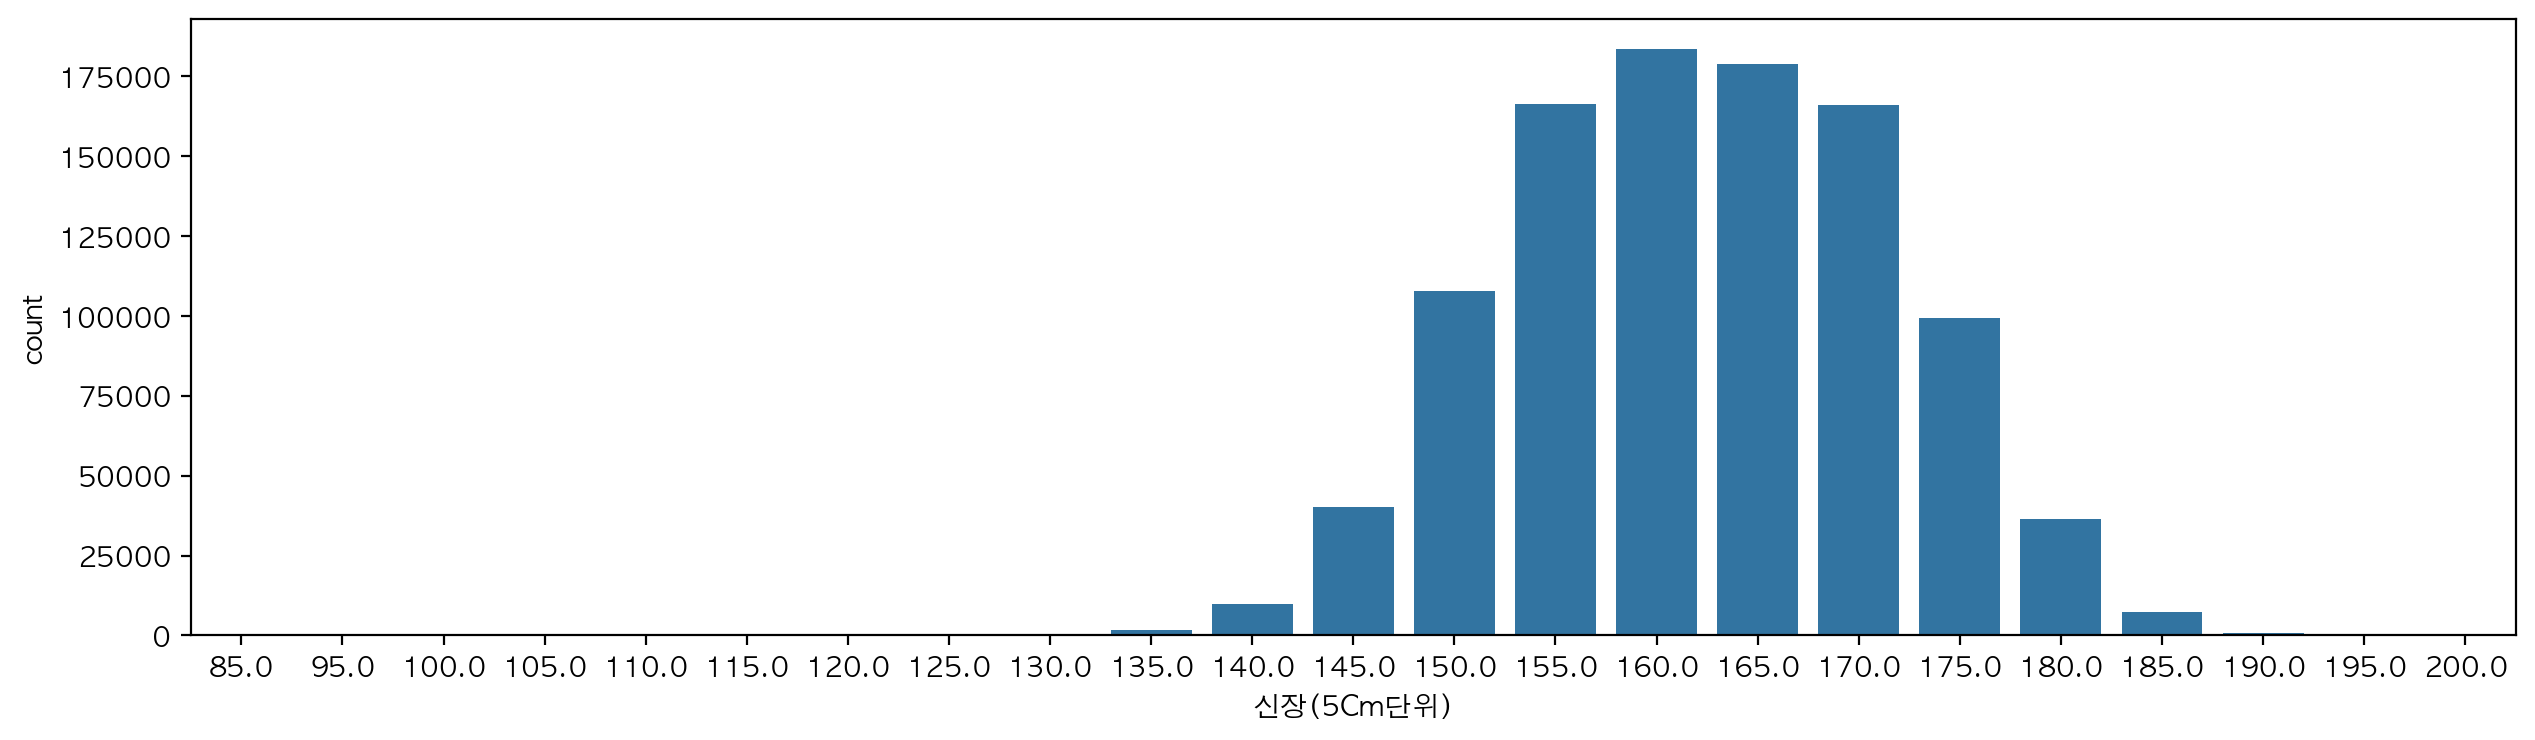

In [27]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

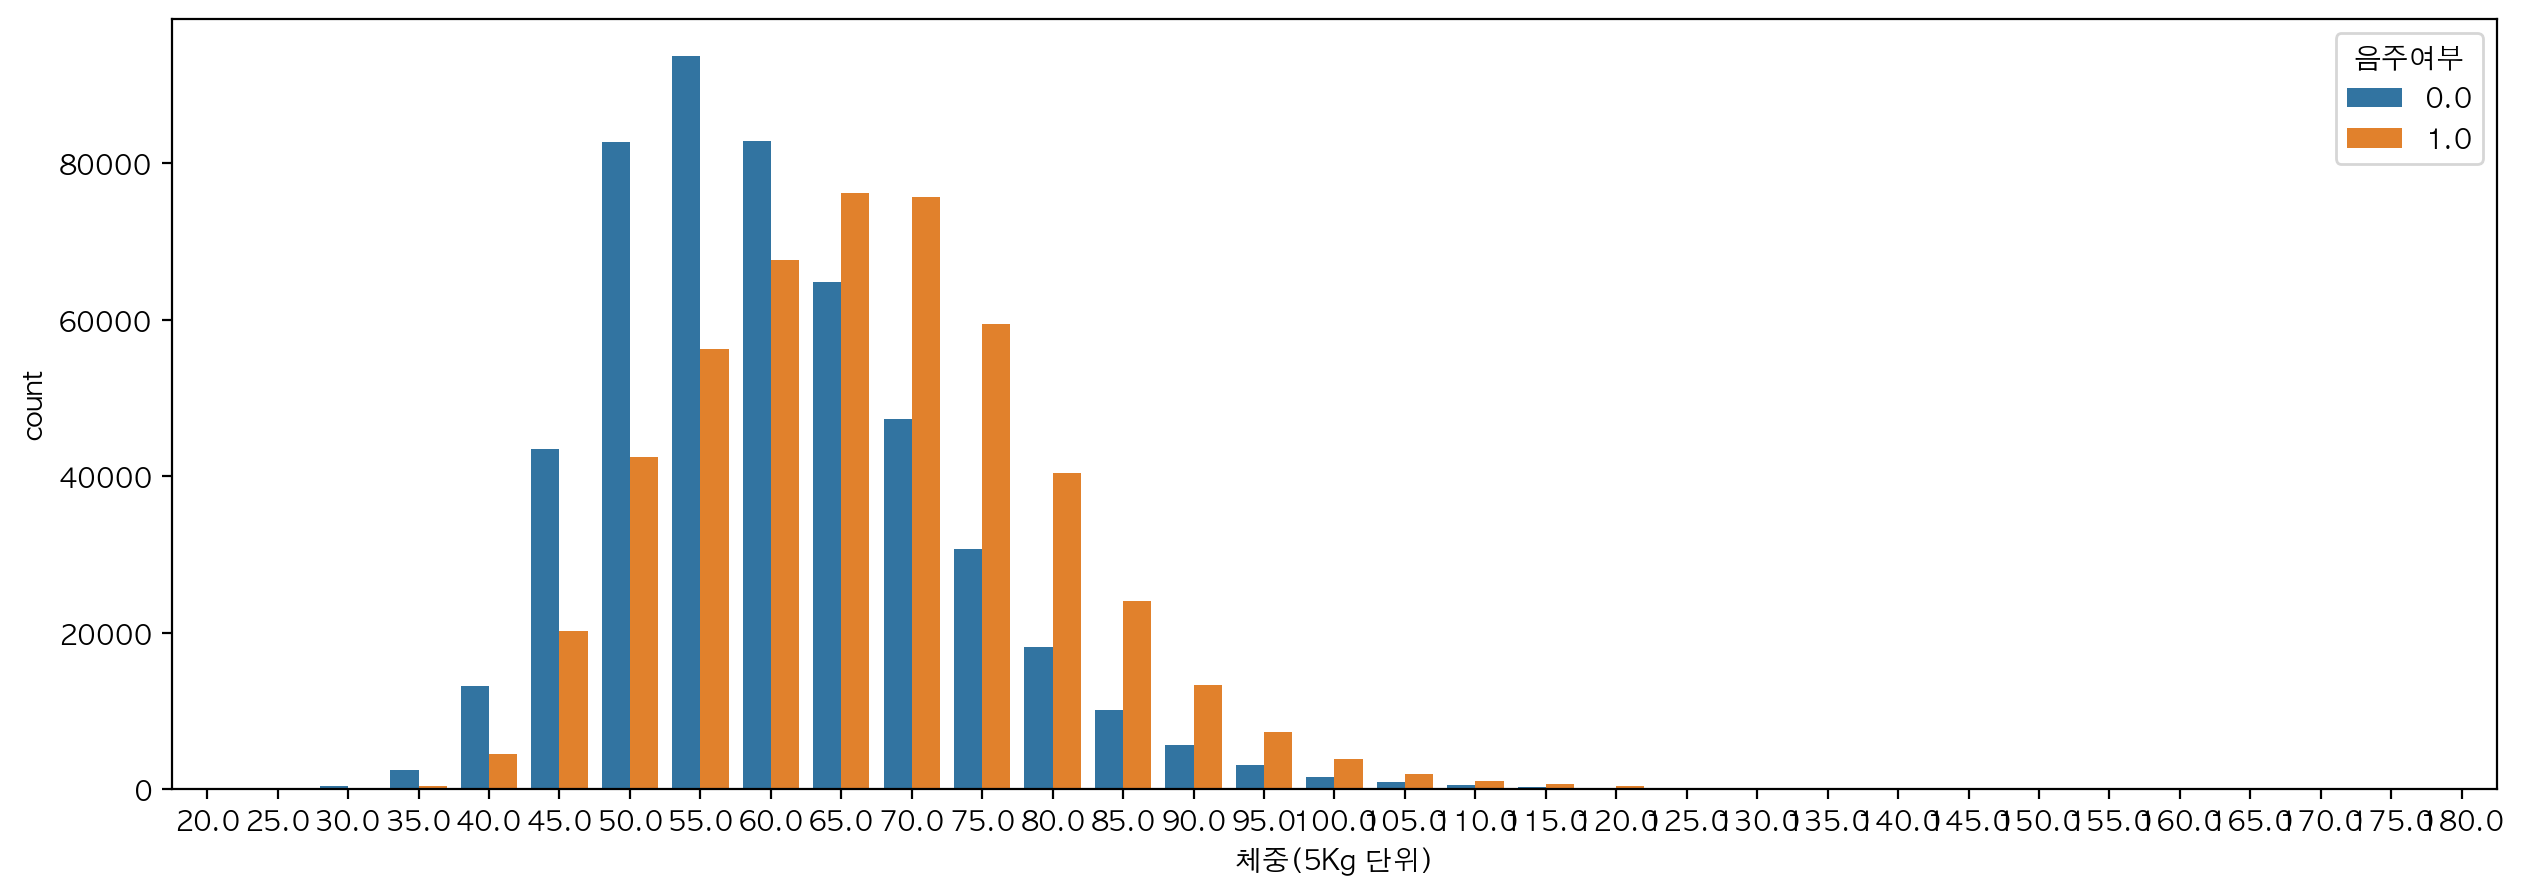

In [29]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

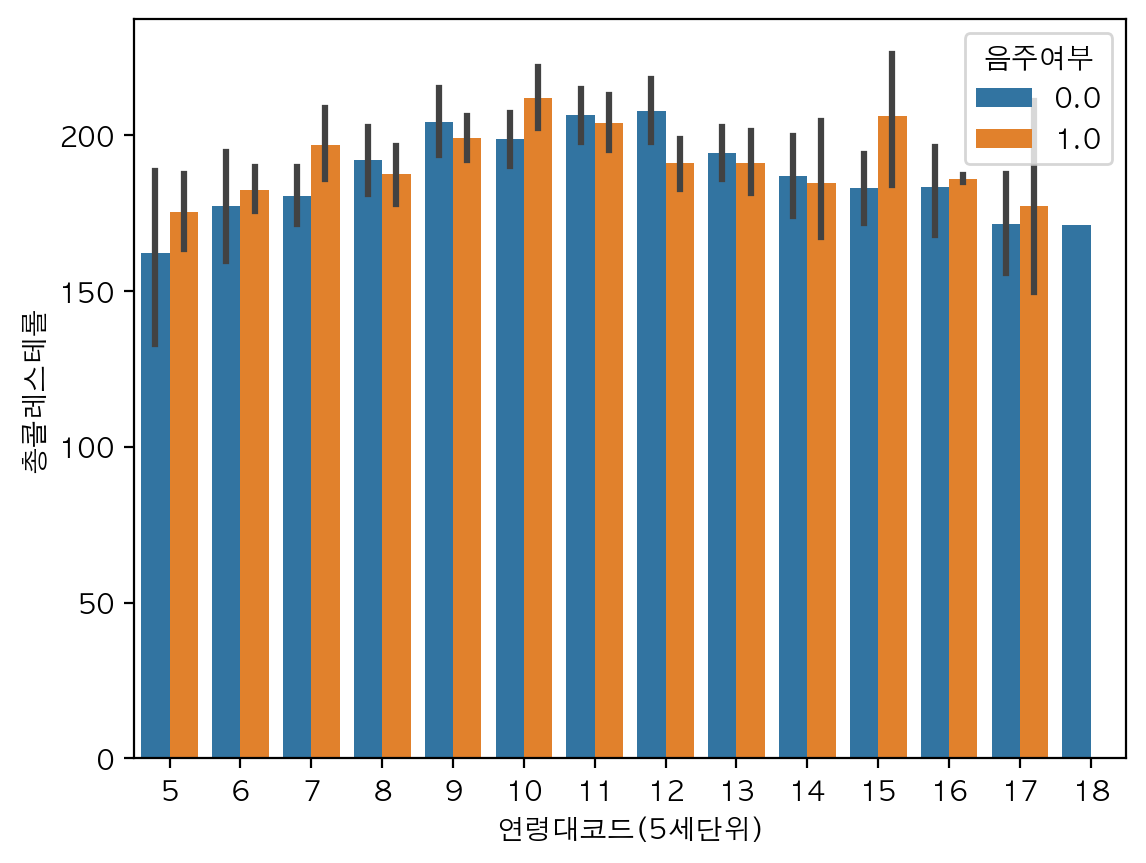

In [31]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")